In [1]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Step 2: Clean the dataset by removing unnecessary columns
columns_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df_cleaned = df.drop(columns=columns_to_drop)

# Show the new shape (rows, columns) and first few rows
print("Shape:", df_cleaned.shape)
df_cleaned.head()


Shape: (1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [3]:
# Step 3: Convert categorical (text) columns into numeric values using Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a copy so we don't change original
df_encoded = df_cleaned.copy()

# List of columns to encode
columns_to_encode = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
                     'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# Create LabelEncoder object
le = LabelEncoder()

# Apply encoding to each column
for col in columns_to_encode:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Show first few rows to confirm changes
df_encoded.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice theme for all plots
sns.set(style='whitegrid')


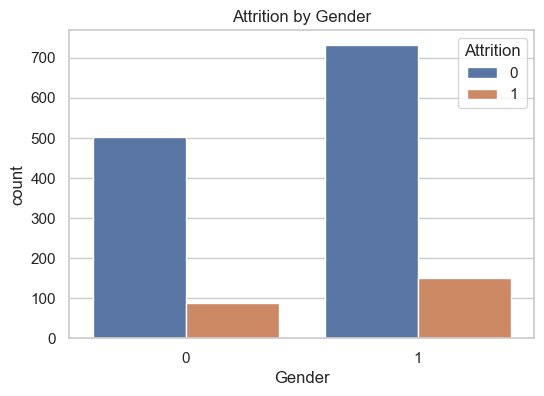

In [5]:
# Plot gender vs attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Attrition', data=df_encoded)
plt.title("Attrition by Gender")
plt.show()


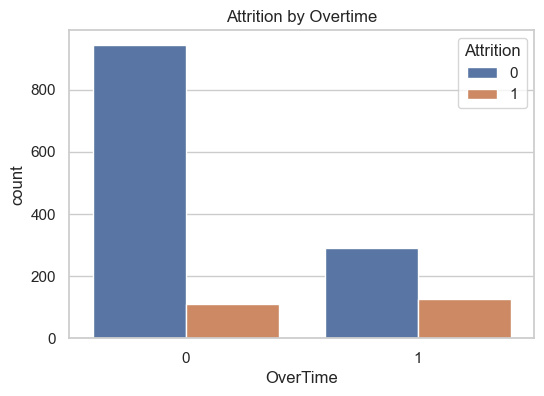

In [6]:
# Plot overtime vs attrition
plt.figure(figsize=(6, 4))
sns.countplot(x='OverTime', hue='Attrition', data=df_encoded)
plt.title("Attrition by Overtime")
plt.show()


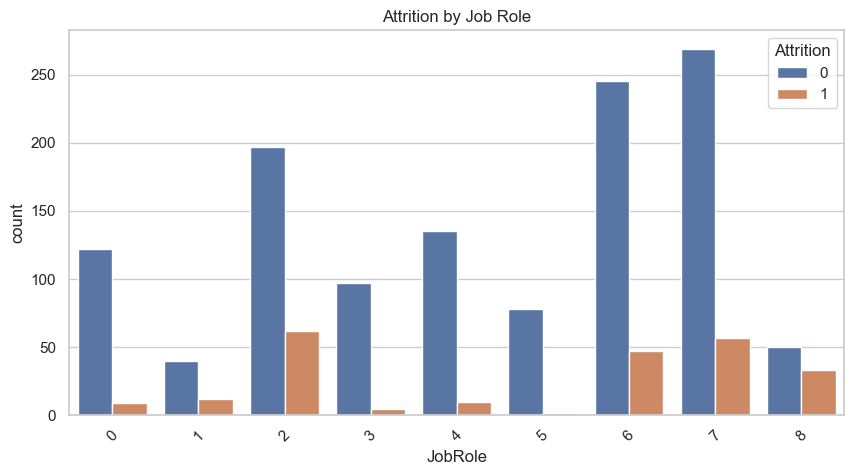

In [7]:
# Job Role vs Attrition
plt.figure(figsize=(10, 5))
sns.countplot(x='JobRole', hue='Attrition', data=df_encoded)
plt.title("Attrition by Job Role")
plt.xticks(rotation=45)
plt.show()


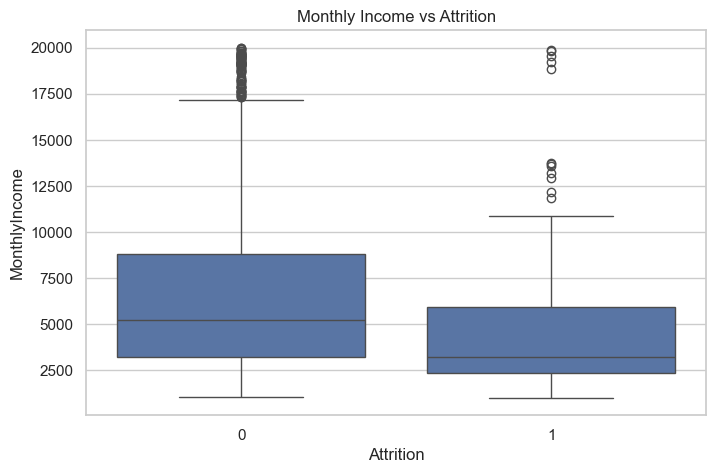

In [8]:
# Boxplot: Monthly Income vs Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_encoded)
plt.title("Monthly Income vs Attrition")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Separate features (X) and target (y)
X = df_encoded.drop("Attrition", axis=1)  # All features
y = df_encoded["Attrition"]              # Target column

# Step 2: Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build and train the decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7993197278911565

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       255
           1       0.24      0.23      0.23        39

    accuracy                           0.80       294
   macro avg       0.56      0.56      0.56       294
weighted avg       0.80      0.80      0.80       294


Confusion Matrix:
 [[226  29]
 [ 30   9]]
